In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 사용을 위해서 세팅
# 출처: https://bskyvision.com/1133
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 데이터 준비

In [3]:
df = pd.read_csv('SDB4_I_CT_CONT_PVT.csv')
df

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,...,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,6,3166565,0,4,3,200702,200702,200702,202202,999912,...,1,1,1,1,1,1,1,1,1,1
1,8,1346256,0,4,2,201812,999912,201812,201912,999912,...,1,1,1,0,0,0,0,0,0,0
2,6,8858774,0,13,2,201309,999912,201309,208009,999912,...,1,1,1,1,1,1,1,1,1,1
3,6,4694185,0,13,2,202002,999912,202002,202102,999912,...,0,0,0,0,0,1,1,1,1,1
4,8,9366539,0,8,2,201804,999912,201804,202804,999912,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368834,3,8180813,0,1,7,201302,201608,201302,999912,999912,...,1,1,1,1,1,1,1,1,1,1
368835,8,7644118,0,1,2,201107,999912,201107,999912,999912,...,1,1,1,1,1,1,1,1,1,1
368836,8,7280863,0,7,2,201605,999912,201605,204605,999912,...,0,0,0,0,0,0,0,0,1,1
368837,6,2172012,0,3,2,201911,999912,201911,207611,999912,...,0,0,1,1,1,1,1,1,1,1


In [4]:
df_mid = df.iloc[:, 4:11]
df_mid

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT
0,3,200702,200702,200702,202202,999912,999912
1,2,201812,999912,201812,201912,999912,999912
2,2,201309,999912,201309,208009,999912,999912
3,2,202002,999912,202002,202102,999912,999912
4,2,201804,999912,201804,202804,999912,999912
...,...,...,...,...,...,...,...
368834,7,201302,201608,201302,999912,999912,999912
368835,2,201107,999912,201107,999912,999912,999912
368836,2,201605,999912,201605,204605,999912,999912
368837,2,201911,999912,201911,207611,999912,999912


In [5]:
for i in range(1, 7):
    df_mid.iloc[:, i] = pd.to_datetime(
        df_mid.iloc[:, i], 
        format='%Y%m', 
        errors='coerce'
    )
df_mid

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT
0,3,2007-02-01,2007-02-01,2007-02-01,2022-02-01,NaT,NaT
1,2,2018-12-01,NaT,2018-12-01,2019-12-01,NaT,NaT
2,2,2013-09-01,NaT,2013-09-01,2080-09-01,NaT,NaT
3,2,2020-02-01,NaT,2020-02-01,2021-02-01,NaT,NaT
4,2,2018-04-01,NaT,2018-04-01,2028-04-01,NaT,NaT
...,...,...,...,...,...,...,...
368834,7,2013-02-01,2016-08-01,2013-02-01,NaT,NaT,NaT
368835,2,2011-07-01,NaT,2011-07-01,NaT,NaT,NaT
368836,2,2016-05-01,NaT,2016-05-01,2046-05-01,NaT,NaT
368837,2,2019-11-01,NaT,2019-11-01,2076-11-01,NaT,NaT


### 주계약상태코드

In [ ]:
df_mid.head()

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_EFCTV_DT2
0,3,2007-02-01,2007-02-01,2007-02-01,2022-02-01,NaT,NaT,0
1,2,2018-12-01,NaT,2018-12-01,2019-12-01,NaT,NaT,0
2,2,2013-09-01,NaT,2013-09-01,2080-09-01,NaT,NaT,0
3,2,2020-02-01,NaT,2020-02-01,2021-02-01,NaT,NaT,0
4,2,2018-04-01,NaT,2018-04-01,2028-04-01,NaT,NaT,0


In [6]:
contract_status = [
    '', 
    '정상(심사중)',
    '정상',
    '청약철회',
    '실효',
    '만기',
    '소멸',
    '해지',
    '무효',
    '취소(품보해지)',
    '취소'
]

In [34]:
df_mid['INS_CT_STAT_CD'] = df_mid['INS_CT_STAT_CD'].apply(
    lambda x: contract_status[x]
)
df_mid['INS_CT_STAT_CD']

<ipython-input-34-e0c6620053bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid['INS_CT_STAT_CD'] = df_mid['INS_CT_STAT_CD'].apply(


0         청약철회
1           정상
2           정상
3           정상
4           정상
          ... 
368834      해지
368835      정상
368836      정상
368837      정상
368838      정상
Name: INS_CT_STAT_CD, Length: 368839, dtype: object

<AxesSubplot:ylabel='INS_CT_STAT_CD'>

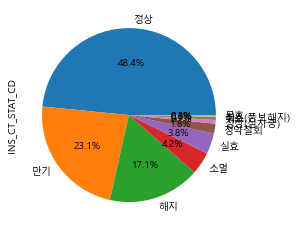

In [35]:
# 파이 그래프
df_mid['INS_CT_STAT_CD'].value_counts().plot(kind='pie', autopct='%.1f%%')

### 보험계약체결월

In [15]:
# 개수 전부 있는지 확인
df_mid['CT_CNCLS_DT'].hasnans

False

#### 시간 흐름: 증가하다 감소

In [ ]:
conclusion_count = df_mid.groupby('CT_CNCLS_DT').count()
conclusion_count

,INS_CT_STAT_CD,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_EFCTV_DT2
CT_CNCLS_DT,,,,,,,
2006-12-01,8295,3386,8295,6561,447,284,8295
2007-01-01,1236,504,1236,949,64,31,1236
2007-02-01,1266,528,1266,997,74,50,1266
2007-03-01,1309,526,1309,1038,92,51,1309
2007-04-01,1273,514,1273,1014,70,42,1273
...,...,...,...,...,...,...,...
2020-02-01,2119,45,2119,1795,11,5,2119
2020-03-01,1876,52,1876,1636,3,6,1876
2020-04-01,1841,42,1841,1527,0,6,1841


<AxesSubplot:xlabel='CT_CNCLS_DT'>

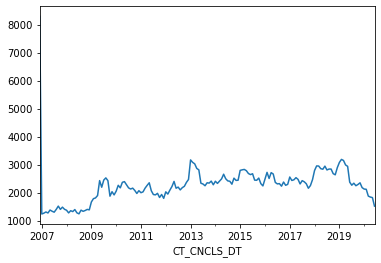

In [ ]:
conclusion_count.iloc[:, 0].plot()

#### 어느 해가 많은지?: 2018년


In [58]:
years = df_mid['CT_CNCLS_DT'].dt.year
years.name = 'Year'
years

0         2007
1         2018
2         2013
3         2020
4         2018
          ... 
368834    2013
368835    2011
368836    2016
368837    2019
368838    2019
Name: Year, Length: 368839, dtype: int64

In [29]:
conclusion_year_count = df_mid.groupby(years).count()
conclusion_year_count

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_EFCTV_DT2
Year,,,,,,,,
2006,8295,8295,3386,8295,6561,447,284,8295
2007,16304,16304,6216,16304,13226,893,500,16304
2008,16091,16091,6394,16091,12985,887,505,16091
2009,25001,25001,7660,25001,20431,1208,939,25001
2010,26099,26099,7109,26099,21401,1071,728,26099
2011,24242,24242,7070,24242,19222,1124,891,24242
2012,26372,26372,7739,26372,20147,1326,821,26372
2013,31223,31223,7819,31223,22808,1738,902,31223
2014,29307,29307,6589,29307,22162,1986,848,29307


<AxesSubplot:xlabel='Year'>

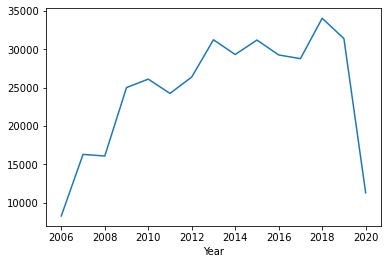

In [31]:
conclusion_year_count['CT_CNCLS_DT'].plot()

#### 어느 달에 가장 많이 체결되는지?: 1~5월, 12월

In [32]:
months = df_mid['CT_CNCLS_DT'].dt.month
months.name = 'Month'
months

0          2
1         12
2          9
3          2
4          4
          ..
368834     2
368835     7
368836     5
368837    11
368838     2
Name: Month, Length: 368839, dtype: int64

In [37]:
conclusion_month_count = df_mid.groupby(months).count()
conclusion_month_count

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_EFCTV_DT2
Month,,,,,,,,
1,31750,31750,6888,31750,24447,1768,805,31750
2,32201,32201,6931,32201,25236,1740,855,32201
3,32093,32093,7186,32093,25603,1663,716,32093
4,32408,32408,7217,32408,25644,1609,705,32408
5,33229,33229,7138,33229,26589,1691,884,33229
6,30293,30293,6360,30293,24388,1583,706,30293
7,28503,28503,5947,28503,22997,1659,679,28503
8,28429,28429,5808,28429,22761,1641,686,28429
9,28314,28314,5633,28314,22666,1688,733,28314


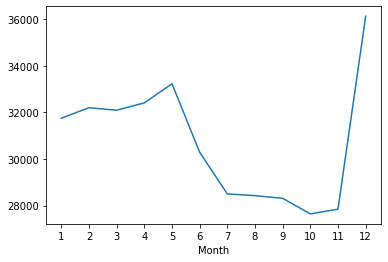

In [ ]:

conclusion_month_count['CT_CNCLS_DT'].plot().set_xticks(range(1, 13))

### 보험계약해지월


In [17]:
# 보험계약해지월이 없는 사람도?
df_mid['CT_TRMNT_DT'].hasnans

True

In [18]:
df_mid.head()

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT
0,3,2007-02-01,2007-02-01,2007-02-01,2022-02-01,NaT,NaT
1,2,2018-12-01,NaT,2018-12-01,2019-12-01,NaT,NaT
2,2,2013-09-01,NaT,2013-09-01,2080-09-01,NaT,NaT
3,2,2020-02-01,NaT,2020-02-01,2021-02-01,NaT,NaT
4,2,2018-04-01,NaT,2018-04-01,2028-04-01,NaT,NaT


#### 보험계약해지월이 보험계약체결월보다 앞선 경우도 있음 (0.04%)

In [21]:
time_in_order = df_mid[
    df_mid['CT_CNCLS_DT'] <= 
    df_mid['CT_TRMNT_DT']
]
time_in_order

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT
0,3,2007-02-01,2007-02-01,2007-02-01,2022-02-01,NaT,NaT
5,7,2008-07-01,2013-01-01,2008-07-01,2028-11-01,NaT,NaT
7,7,2012-07-01,2017-05-01,2012-07-01,2023-07-01,NaT,NaT
12,6,2015-08-01,2020-02-01,2015-08-01,2079-08-01,NaT,NaT
13,7,2009-03-01,2011-08-01,2009-03-01,2053-03-01,NaT,NaT
...,...,...,...,...,...,...,...
368810,7,2016-06-01,2020-04-01,2016-06-01,2021-06-01,2019-12-01,NaT
368820,7,2008-02-01,2009-03-01,2008-02-01,2045-02-01,2009-03-01,NaT
368828,7,2015-03-01,2019-11-01,2015-03-01,2038-03-01,NaT,NaT
368831,7,2013-01-01,2014-04-01,2013-01-01,2076-01-01,NaT,NaT


In [22]:
time_not_in_order = df_mid[
    df_mid['CT_CNCLS_DT'] >
    df_mid['CT_TRMNT_DT']
]
time_not_in_order

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT
1623,7,2006-12-01,2006-10-01,2006-12-01,2016-08-01,NaT,NaT
4446,7,2006-12-01,2006-10-01,2006-12-01,NaT,NaT,NaT
6101,10,2006-12-01,2006-06-01,2006-12-01,2026-05-01,NaT,NaT
10002,7,2006-12-01,2006-02-01,2006-12-01,2007-02-01,NaT,NaT
13574,7,2006-12-01,2000-02-01,2006-12-01,2007-09-01,NaT,NaT
...,...,...,...,...,...,...,...
360301,5,2006-12-01,2006-11-01,2006-12-01,2006-12-01,NaT,NaT
362008,7,2006-12-01,2006-10-01,2006-12-01,2007-10-01,NaT,NaT
364488,7,2006-12-01,2006-11-01,2006-12-01,2021-09-01,NaT,NaT
365074,7,2006-12-01,2006-11-01,2006-12-01,2007-09-01,NaT,NaT


([<matplotlib.patches.Wedge at 0xa5922e0>,
 [Text(-0.8580185710709923, 0.6883343168092759, 'NaT'),
  Text(0.8572265041911342, -0.6893204773632128, 'In-order'),
  Text(1.0999992727652639, -0.0012648778165032285, 'Not In-order')],
 [Text(-0.46801012967508665, 0.37545508189596866, '78.48%'),
  Text(0.4675780931951641, -0.3759929876526615, '21.48%'),
  Text(0.5999996033265075, -0.0006899333544563063, '0.04%')])

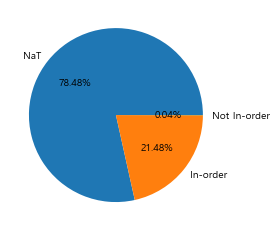

In [25]:
nat_len = len(df_mid) - len(time_in_order) - len(time_not_in_order)

plt.pie(
    [nat_len, len(time_in_order), len(time_not_in_order)],
    labels=('NaT', 'In-order', 'Not In-order'),
    autopct='%.2f%%'
)

#### 보험계약체결월에서 보통 얼마나 지나고 끊는지?: 1년 지나고 끊는 경우가 대부분

In [111]:
# 해지월에서 체결월 빼기
term = df_mid['CT_TRMNT_DT'] - df_mid['CT_CNCLS_DT']
# 해지월이 없는 값은 제외
term = term[term.notna()]
# 해지월이 더 늦는 경우의 값만 추출
term = term[term.dt.days >= 0]
term = term.dt.days
# 정렬하여 출력
term.sort_values()

0            0
30476        0
254956       0
347429       0
254975       0
          ... 
234661    4931
84069     4931
349116    4931
38641     4931
310285    4931
Length: 79243, dtype: int64

In [112]:
term.describe()

count    79243.000000
mean      1237.234368
std        989.846460
min          0.000000
25%        366.000000
50%       1034.000000
75%       1826.000000
max       4931.000000
dtype: float64

In [116]:
term_count = term.value_counts()
term_count

365     6745
366     1876
0       1710
31      1227
1826    1037
        ... 
4202       1
4686       1
4472       1
4233       1
4625       1
Length: 670, dtype: int64

<AxesSubplot:>

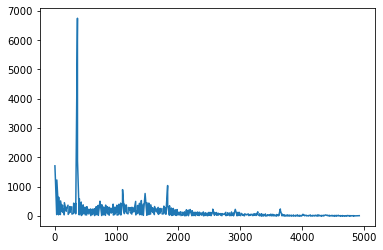

In [121]:
term_count.sort_index().plot()

#### 1년만에 해지한 경우가 실제 계약 기간이 1년?
아니면 그냥 원래 정한 계약 기간보다 일찍 해지한 것인지?

: 대부분은 실제 계약 기간과 같음. 일부는 다름.

In [32]:
df_mid['CT_TERM_DAYS'] = (df_mid['CT_TRMNT_DT'] - df_mid['CT_CNCLS_DT']).dt.days
df_mid['CT_TERM_DAYS']

<ipython-input-32-39c2d8793dfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid['CT_TERM_DAYS'] = (df_mid['CT_TRMNT_DT'] - df_mid['CT_CNCLS_DT']).dt.days


0            0.0
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
368834    1277.0
368835       NaN
368836       NaN
368837       NaN
368838       NaN
Name: CT_TERM_DAYS, Length: 368839, dtype: float64

In [36]:
df_mid[df_mid['CT_TERM_DAYS'] == 365]

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
48,소멸,2017-03-01,2018-03-01,2017-03-01,2018-03-01,NaT,NaT,365.0
103,만기,2009-09-01,2010-09-01,2009-09-01,2010-09-01,NaT,NaT,365.0
181,만기,2009-04-01,2010-04-01,2009-04-01,2010-04-01,NaT,NaT,365.0
324,해지,2017-08-01,2018-08-01,2017-08-01,2037-08-01,NaT,NaT,365.0
345,소멸,2018-02-01,2019-02-01,2018-02-01,2019-02-01,NaT,NaT,365.0
...,...,...,...,...,...,...,...,...
368500,만기,2011-02-01,2012-02-01,2011-02-01,2012-02-01,NaT,NaT,365.0
368632,만기,2009-05-01,2010-05-01,2009-05-01,2010-05-01,NaT,NaT,365.0
368666,만기,2010-07-01,2011-07-01,2010-07-01,2011-07-01,NaT,NaT,365.0
368731,해지,2009-07-01,2010-07-01,2009-07-01,2010-07-01,NaT,NaT,365.0


In [39]:
# 보험계약해지월과 보험종기월이 다른 경우
df_mid[
    (df_mid['CT_TERM_DAYS'] == 365) & 
    (df_mid['CT_TRMNT_DT'] != df_mid['CT_END_DT'])
]

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
324,해지,2017-08-01,2018-08-01,2017-08-01,2037-08-01,NaT,NaT,365.0
970,해지,2008-08-01,2009-08-01,2008-08-01,2018-08-01,NaT,NaT,365.0
1283,해지,2017-01-01,2018-01-01,2017-01-01,NaT,NaT,NaT,365.0
1373,해지,2010-10-01,2011-10-01,2010-10-01,2094-10-01,NaT,NaT,365.0
1463,해지,2012-11-01,2013-11-01,2012-11-01,2015-11-01,NaT,NaT,365.0
...,...,...,...,...,...,...,...,...
367061,해지,2010-11-01,2011-11-01,2010-11-01,2020-11-01,NaT,NaT,365.0
367125,해지,2006-12-01,2007-12-01,2006-12-01,2040-07-01,NaT,NaT,365.0
367422,해지,2018-04-01,2019-04-01,2018-04-01,2038-04-01,NaT,NaT,365.0
368032,해지,2017-08-01,2018-08-01,2017-08-01,2027-08-01,NaT,NaT,365.0


In [43]:
# 보험계약해지월과 보험종기월이 다른데, 해지가 아닌 경우
df_mid[
    (df_mid['CT_TERM_DAYS'] == 365) & 
    (df_mid['CT_TRMNT_DT'] != df_mid['CT_END_DT']) &
    (df_mid['INS_CT_STAT_CD'] != '해지')
]

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
6389,무효,2009-05-01,2010-05-01,2009-05-01,2019-05-01,NaT,NaT,365.0
48184,소멸,2012-06-01,2013-06-01,2012-06-01,2019-06-01,NaT,NaT,365.0
52890,소멸,2010-07-01,2011-07-01,2010-07-01,2030-11-01,NaT,NaT,365.0
70454,소멸,2012-03-01,2013-03-01,2012-03-01,NaT,NaT,NaT,365.0
89595,소멸,2012-05-01,2013-05-01,2012-05-01,NaT,NaT,NaT,365.0
93626,소멸,2013-12-01,2014-12-01,2013-12-01,2023-12-01,NaT,NaT,365.0
94914,소멸,2013-03-01,2014-03-01,2013-03-01,NaT,NaT,NaT,365.0
101812,만기,2016-05-01,2017-05-01,2016-05-01,2017-04-01,NaT,NaT,365.0
110696,소멸,2011-01-01,2012-01-01,2011-01-01,2040-01-01,NaT,NaT,365.0
111855,소멸,2006-12-01,2007-12-01,2006-12-01,NaT,NaT,NaT,365.0


### 보험시기월

In [ ]:
# 보험시기월 정의?

In [44]:
# 보험시기월 전부 값 있음
df_mid['CT_ST_DT'].hasnans

False

#### 보험시기월이 보험계약체결월보다 더 이른 경우 있음 (0.45%)

In [45]:
start_faster = df_mid[
    df_mid['CT_CNCLS_DT'] >
    df_mid['CT_ST_DT']
]
start_faster[['CT_CNCLS_DT', 'CT_ST_DT']]

,CT_CNCLS_DT,CT_ST_DT
220,2017-03-01,2017-02-01
230,2011-02-01,2011-01-01
250,2019-02-01,2019-01-01
415,2017-05-01,2017-04-01
563,2010-12-01,2010-11-01
...,...,...
367484,2012-07-01,2012-06-01
367992,2019-04-01,2019-03-01
368194,2010-12-01,2010-11-01
368689,2014-08-01,2014-07-01


([<matplotlib.patches.Wedge at 0x153fe0b8>,
 [Text(-1.0998920285362295, 0.015411864340773337, ''),
  Text(1.099892029640995, -0.015411785497228315, '')],
 [Text(-0.5999411064743069, 0.008406471458603638, '99.55%'),
  Text(0.5999411070769063, -0.008406428453033625, '0.45%')])

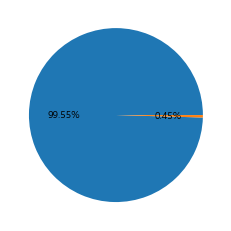

In [46]:
plt.pie(
    (len(df_mid) - len(start_faster), len(start_faster)), 
    autopct='%.2f%%'
)

### 보험종기월

### 보험실효월

#### 보험계약체결월에서 보통 얼마나 지나고 돈 안 내는지?: 약 2년 내에 몰려있음

In [122]:
df_mid.head()

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_EFCTV_DT2
0,3,2007-02-01,2007-02-01,2007-02-01,2022-02-01,NaT,NaT,0
1,2,2018-12-01,NaT,2018-12-01,2019-12-01,NaT,NaT,0
2,2,2013-09-01,NaT,2013-09-01,2080-09-01,NaT,NaT,0
3,2,2020-02-01,NaT,2020-02-01,2021-02-01,NaT,NaT,0
4,2,2018-04-01,NaT,2018-04-01,2028-04-01,NaT,NaT,0


In [123]:
# 실효월에서 체결월 빼기
term = df_mid['CT_EFCTV_DT'] - df_mid['CT_CNCLS_DT']
# 실효월이 없는 값은 제외
term = term[term.notna()]
# 실효월이 더 늦는 경우의 값만 추출
term = term[term.dt.days >= 0]
term = term.dt.days
# 정렬하여 출력
term.sort_values()

225691       0
93693        0
147030       0
16744        0
59289        0
          ... 
315913    4780
97179     4808
66436     4839
185074    4839
223700    4839
Length: 19943, dtype: int64

In [125]:
term.describe()

count    19943.000000
mean       851.399438
std        916.404287
min          0.000000
25%        228.500000
50%        457.000000
75%       1155.000000
max       4839.000000
dtype: float64

In [140]:
term_count = term.value_counts()
term_count

153     578
122     423
92      418
365     390
273     378
       ... 
4293      1
4565      1
2950      1
3590      1
4444      1
Length: 593, dtype: int64

<AxesSubplot:>

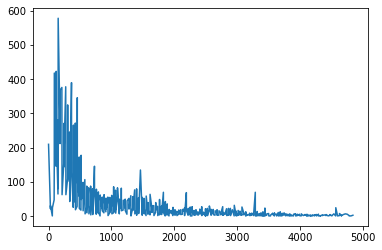

In [141]:
term_count.sort_index().plot()

### 보험부활월

#### 부활월은 있는데, 실효월이 없는 경우도 있는지?: 있음



In [60]:
df_mid[df_mid['CT_RST_DT'].notna()]

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
53,정상,2016-09-01,NaT,2016-09-01,2028-09-01,NaT,2018-05-01,NaN
55,해지,2007-05-01,2010-05-01,2007-05-01,NaT,NaT,2008-09-01,1096.0
127,정상,2009-09-01,NaT,2009-09-01,2028-09-01,NaT,2013-04-01,NaN
158,정상,2016-10-01,NaT,2016-10-01,2036-10-01,NaT,2019-11-01,NaN
164,해지,2013-06-01,2018-10-01,2013-06-01,NaT,2018-04-01,2017-02-01,1948.0
...,...,...,...,...,...,...,...,...
368627,정상,2018-12-01,NaT,2018-12-01,2038-12-01,NaT,2020-06-01,NaN
368676,정상,2015-09-01,NaT,2015-09-01,NaT,2020-02-01,2020-02-01,NaN
368739,해지,2011-07-01,2014-03-01,2011-07-01,NaT,NaT,2013-08-01,974.0
368771,정상,2009-02-01,NaT,2009-02-01,2065-02-01,NaT,2019-04-01,NaN


In [61]:
df_mid[
    (df_mid['CT_RST_DT'].notna()) &
    (df_mid['CT_EFCTV_DT'].notna())
]

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
164,해지,2013-06-01,2018-10-01,2013-06-01,NaT,2018-04-01,2017-02-01,1948.0
288,정상,2010-11-01,NaT,2010-11-01,2036-11-01,2015-03-01,2015-03-01,NaN
388,해지,2015-12-01,2020-05-01,2015-12-01,2046-12-01,2017-05-01,2017-03-01,1613.0
433,정상,2009-07-01,NaT,2009-07-01,2070-07-01,2015-11-01,2015-11-01,NaN
588,실효,2011-05-01,NaT,2011-05-01,NaT,2012-08-01,2012-02-01,NaN
...,...,...,...,...,...,...,...,...
368439,정상,2017-06-01,NaT,2017-06-01,2032-06-01,2018-08-01,2019-07-01,NaN
368445,해지,2007-10-01,2012-02-01,2007-10-01,2022-10-01,2010-12-01,2008-12-01,1584.0
368463,정상,2018-04-01,NaT,2018-04-01,2028-04-01,2018-09-01,2018-11-01,NaN
368619,해지,2015-01-01,2016-12-01,2015-01-01,2086-01-01,2016-12-01,2015-11-01,700.0


In [66]:
# 실효월보다 부활월이 더 늦는 경우
df_mid[
    df_mid['CT_EFCTV_DT'] < df_mid['CT_RST_DT']
]

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
1568,정상,2015-07-01,NaT,2015-07-01,NaT,2017-11-01,2017-12-01,NaN
2926,정상,2006-12-01,NaT,2006-12-01,2030-09-01,2017-03-01,2019-09-01,NaN
3326,정상,2013-04-01,NaT,2013-04-01,2037-08-01,2016-06-01,2016-07-01,NaN
3954,정상,2009-06-01,NaT,2009-06-01,2025-06-01,2013-09-01,2014-01-01,NaN
5462,정상,2013-12-01,NaT,2013-12-01,NaT,2019-11-01,2020-04-01,NaN
...,...,...,...,...,...,...,...,...
366018,정상,2017-11-01,NaT,2017-11-01,NaT,2018-05-01,2018-06-01,NaN
367362,정상,2012-05-01,NaT,2012-05-01,2066-05-01,2013-02-01,2013-03-01,NaN
368203,정상,2011-11-01,NaT,2011-11-01,NaT,2016-06-01,2016-12-01,NaN
368439,정상,2017-06-01,NaT,2017-06-01,2032-06-01,2018-08-01,2019-07-01,NaN


In [69]:
# 실효월보다 부활월이 더 늦는 경우 & 정상이 아닌 경우
df_mid[
    (df_mid['CT_EFCTV_DT'] < df_mid['CT_RST_DT']) &
    (df_mid['INS_CT_STAT_CD'] != '정상')
]

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
5761,만기,2012-07-01,2017-07-01,2012-07-01,2017-07-01,2014-03-01,2015-04-01,1826.0
8047,해지,2012-11-01,2018-11-01,2012-11-01,NaT,2014-11-01,2014-12-01,2191.0
20650,해지,2012-03-01,2017-07-01,2012-03-01,2027-03-01,2016-08-01,2016-09-01,1948.0
23500,해지,2011-07-01,2019-09-01,2011-07-01,NaT,2019-06-01,2019-09-01,2984.0
27574,해지,2014-11-01,2019-10-01,2014-11-01,2095-11-01,2019-05-01,2019-07-01,1795.0
...,...,...,...,...,...,...,...,...
336901,해지,2014-04-01,2015-03-01,2014-04-01,2024-04-01,2014-09-01,2014-10-01,334.0
337131,해지,2011-01-01,2017-03-01,2011-01-01,2031-08-01,2014-03-01,2014-04-01,2251.0
345170,해지,2008-03-01,2010-08-01,2008-03-01,2013-03-01,2008-07-01,2008-08-01,883.0
348564,만기,2006-12-01,2014-10-01,2006-12-01,2014-10-01,2012-05-01,2012-07-01,2861.0


In [70]:
# 실효월이 부활월보다 더 빠른 경우
df_mid[
    df_mid['CT_EFCTV_DT'] > df_mid['CT_RST_DT']
]

,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
164,해지,2013-06-01,2018-10-01,2013-06-01,NaT,2018-04-01,2017-02-01,1948.0
388,해지,2015-12-01,2020-05-01,2015-12-01,2046-12-01,2017-05-01,2017-03-01,1613.0
588,실효,2011-05-01,NaT,2011-05-01,NaT,2012-08-01,2012-02-01,NaN
1676,실효,2016-04-01,NaT,2016-04-01,2031-04-01,2018-11-01,2018-09-01,NaN
1936,실효,2018-05-01,NaT,2018-05-01,2028-05-01,2019-09-01,2019-06-01,NaN
...,...,...,...,...,...,...,...,...
367144,실효,2013-07-01,NaT,2013-07-01,2023-07-01,2018-06-01,2016-12-01,NaN
367581,실효,2018-08-01,NaT,2018-08-01,2020-08-01,2020-04-01,2020-01-01,NaN
368071,해지,2013-10-01,2018-07-01,2013-10-01,2046-10-01,2017-05-01,2017-03-01,1734.0
368445,해지,2007-10-01,2012-02-01,2007-10-01,2022-10-01,2010-12-01,2008-12-01,1584.0


In [71]:
# 실효월이 부활월보다 더 빠른 경우의 비율
df_mid[
    df_mid['CT_EFCTV_DT'] > df_mid['CT_RST_DT']
].groupby('INS_CT_STAT_CD').count()

,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_TERM_DAYS
INS_CT_STAT_CD,,,,,,,
소멸,11,8,11,7,11,11,8
실효,721,0,721,524,721,721,0
정상,3,0,3,2,3,3,0
취소,1,1,1,0,1,1,1
취소(품보해지),1,1,1,1,1,1,1
해지,406,406,406,358,406,406,406
